## Programmieraufgabe Quantisierung



Setzen Sie die Bitbreite einer CD-Aufnahme Ihrer Wahl auf 8 Bit herab!  Wird Quantisierungsrauschen hörbar? Variieren Sie die Bitbreite weiter.

Alternativ/ergänzend können Sie ein Graustufenbild in der Helligkeitsquantisierung modifizieren. Wie zeigen sich Quantisierungsartefakte bildlich?



## Lösung



init.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

Audio Datei laden und normieren:



In [1]:
S_filename = "/home/jbatke/Version/CMD_MMI/Vorlesung/1Battle_Royal.wav" # hier eine eigene Datei einfügen
[f_rate, x_data_MC] = wavfile.read(S_filename)
x_data_M = np.sum(x_data_MC/2**14, 1)/2 # Mono-Signal bilden und normieren

:RESULTS:
  /tmp/ipykernel_747018/1185625489.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
    [f_rate, x_data_MC] = wavfile.read(S_filename)
  :END:

\#+END<sub>SRC</sub>

Erste Sekunde ausgeben



Text(0, 0.5, 'Amplitude normiert')

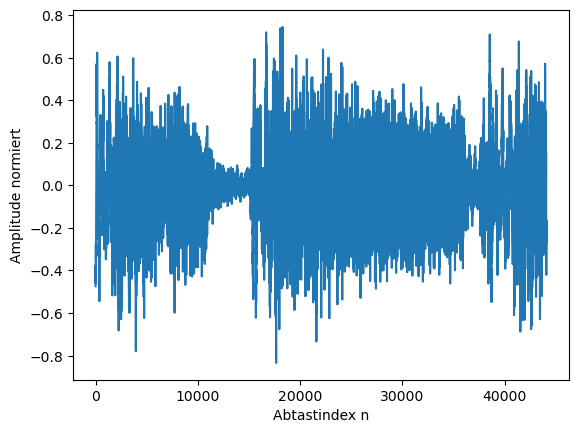

In [1]:
t_duration = 1
t_offset = 0.4
n_start = int(t_offset*f_rate)
n_stop  = n_start + int(t_duration*f_rate)
n_display_N = np.arange(n_start, n_stop)
plt.plot(x_data_M[n_display_N])
plt.xlabel("Abtastindex n")
plt.ylabel("Amplitude normiert")

Midlevel-Quantisierer



In [1]:
def quantisierer(x, bit = 3):
    """Quantise data x according to number of bits b.

       x   data
       bit number of bits available for quantisation

       returns quantised data of x
       """
    s_max = 2**(bit-1)
    y = np.round(s_max * x)/s_max
    return y

quantisiere Signal



Text(0, 0.5, 'Signalamplitude normiert')

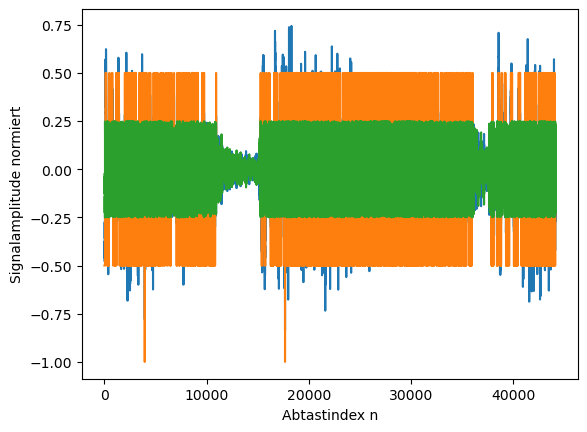

In [1]:
y_data_M = quantisierer(x_data_M, bit = 2)
plt.plot(x_data_M[n_display_N])
plt.plot(y_data_M[n_display_N])
plt.plot(1*(y_data_M[n_display_N]-x_data_M[n_display_N]))
plt.xlabel("Abtastindex n")
plt.ylabel("Signalamplitude normiert")

Sound ausgeben



In [1]:
import sounddevice as sd
sd.play(y_data_M-x_data_M, f_rate)

In [1]:
sd.play(y_data_M, f_rate)